# Q.1) A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

### Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Dataset 

In [2]:
c_data=pd.read_csv("Company_Data.csv")
c_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

### Encoding The Categorical variable

In [3]:
label_encoder=preprocessing.LabelEncoder()
c_data['ShelveLoc']=label_encoder.fit_transform(c_data['ShelveLoc'])
c_data['Urban']=label_encoder.fit_transform(c_data['Urban'])
c_data['US']=label_encoder.fit_transform(c_data['US'])
c_data

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

### Spliting The Dataset into Independent and Dependent variables 

In [4]:
x=c_data.drop(['ShelveLoc'],axis=1) #Independent variable
y=c_data['ShelveLoc']#Dependent Variable

In [5]:
x

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     Urban  US  
0        1   1  
1        1   1  
2        1   1  
3        1   1  
4        1   0  
..     ...  ..  
395      1   1  
396      0   1  
397      1   1  
398      1   1  
399      1   1  

[400 rows x 10 columns]

In [6]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

### EDA 

In [7]:
c_data['ShelveLoc'].unique()

array([0, 1, 2])

In [8]:
c_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [9]:
colnames=list(c_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [10]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [11]:
c_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [12]:
c_data.shape

(400, 11)

In [13]:
c_data[c_data.duplicated()].shape

(0, 11)

In [14]:
#print the duplicates
c_data[c_data.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

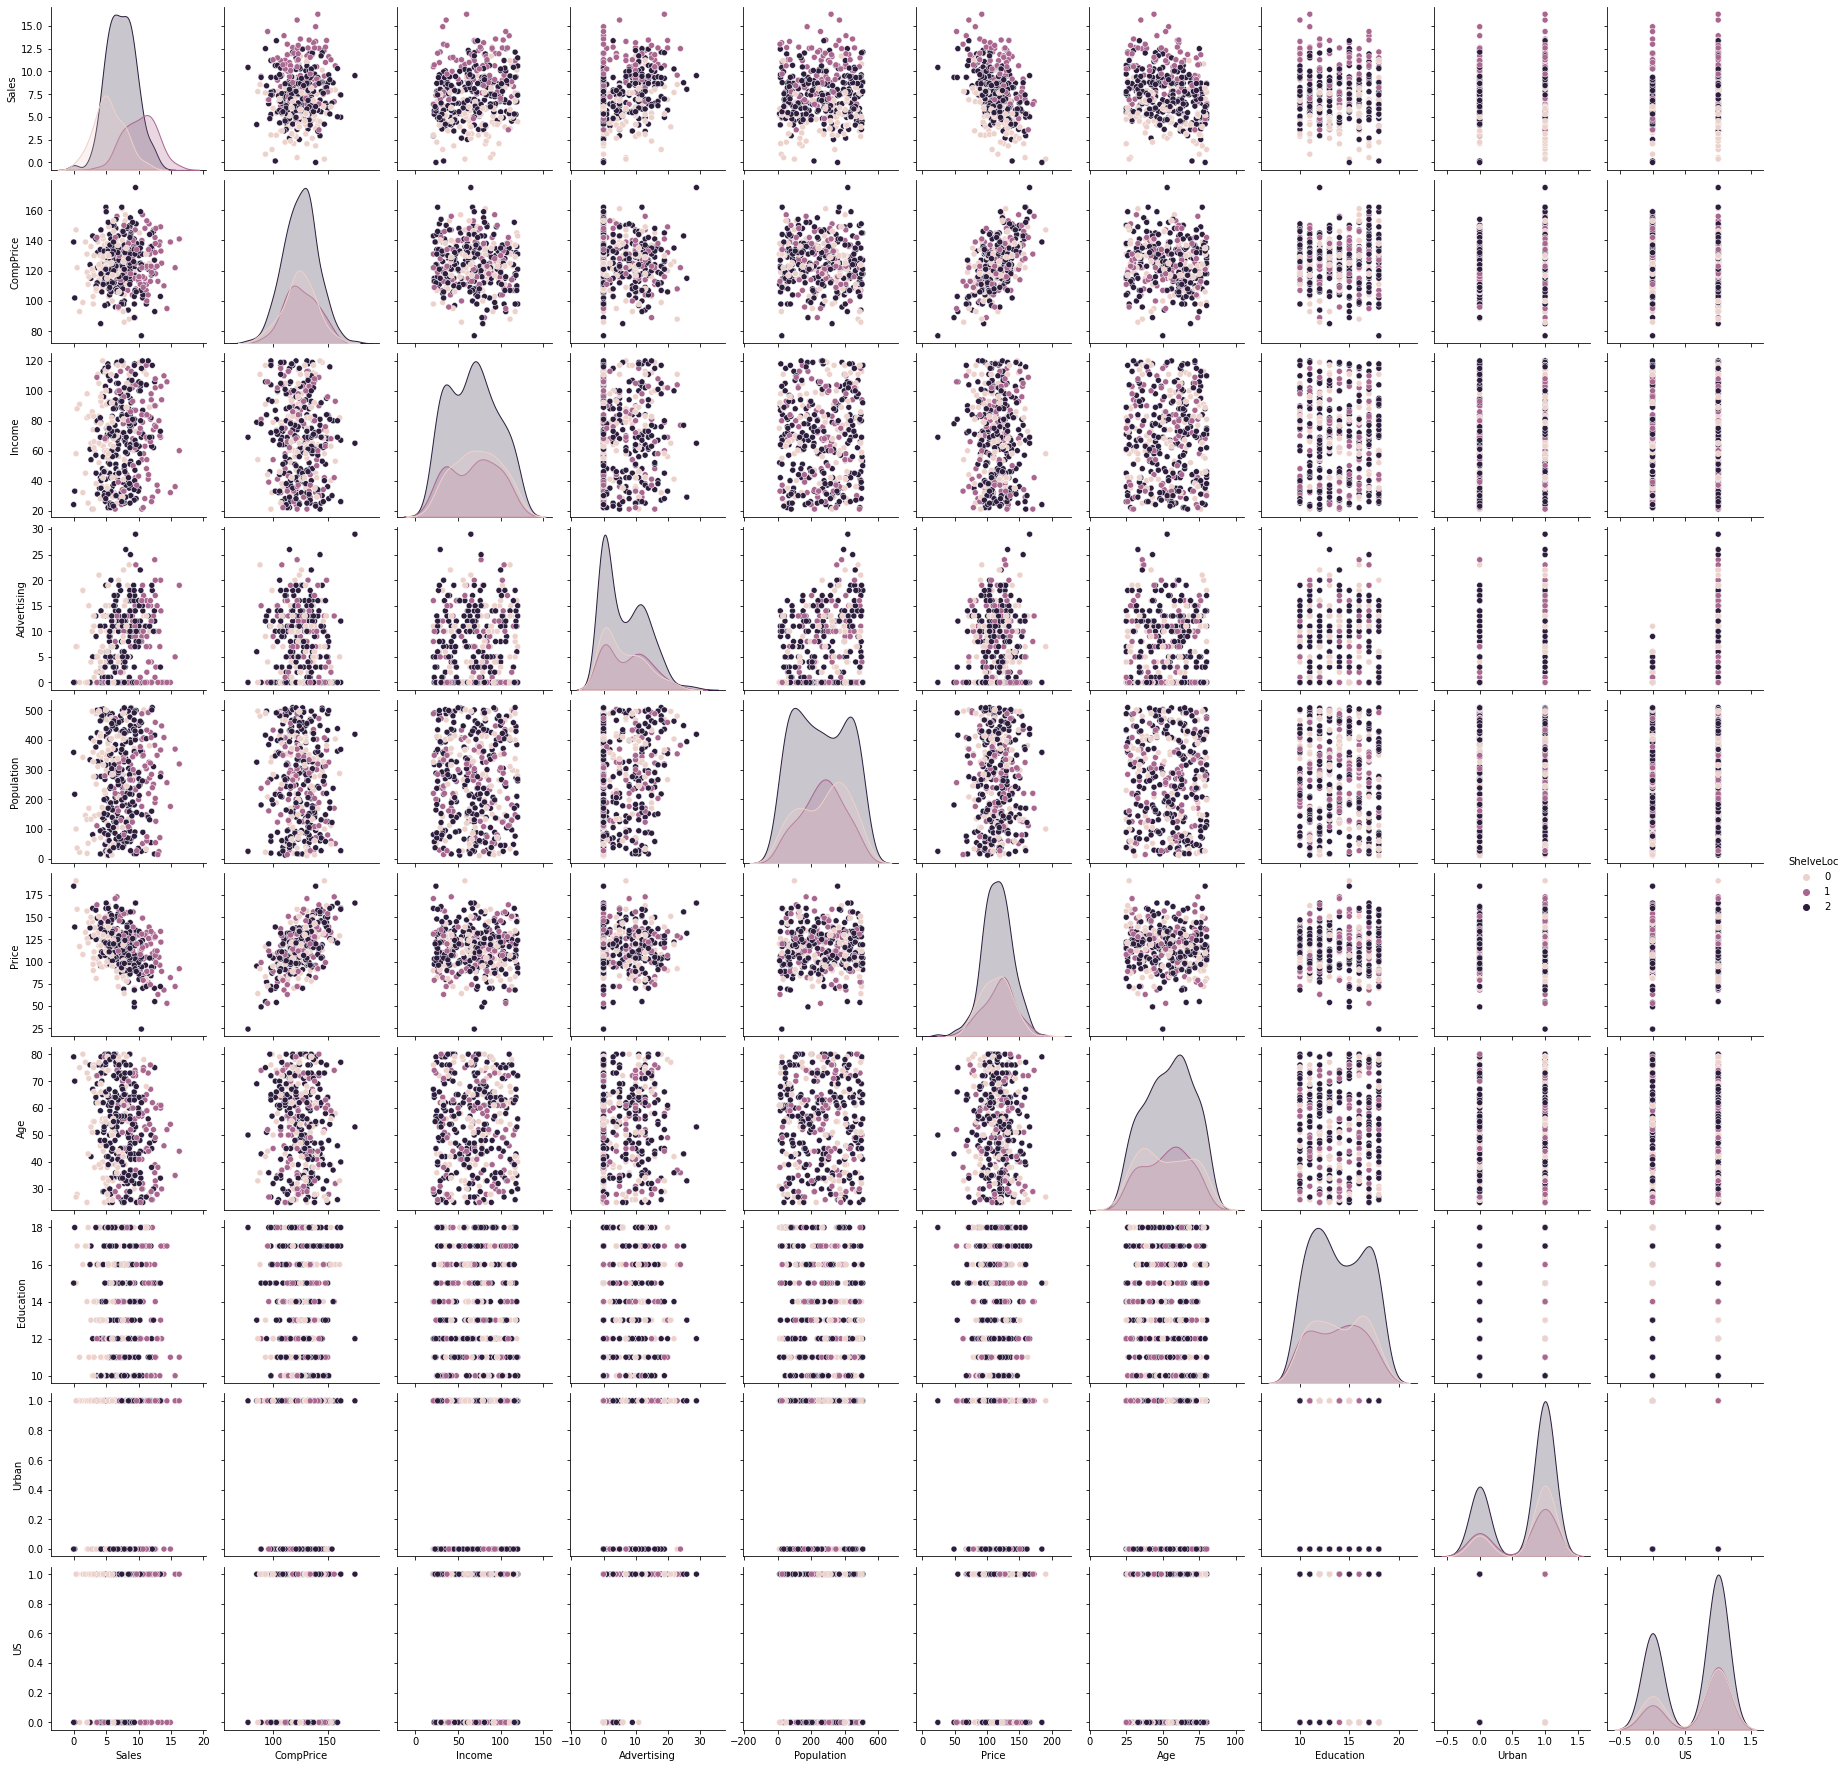

In [15]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=c_data, hue = 'ShelveLoc')

In [16]:
c_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price   ShelveLoc         Age   Education       Urban          US  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   115.795000    1.307500   53.322500   13.900000    0.705000    0.645000  
std     23.676664    0.833475   16.200297    2.620528    0.456614    0.479113  
min     24.000000    0.000000   25.000000   10.000000    0.000000    0.000000  
25%    100.000000    1.000000   39.750000   12.000000    0.000000    0.000000  
50%    117.000000    2.000000   54.500000   14.000000    1.000000    1.000000  
75%    131.000000    2.000000   66.000000   16.000000    1.000000    1.000000  
max    191.000000    2.000000   80.000000   18.000000    1.000000    1.000000

### Splitting data into training and testing data set  

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Building Decision Tree Classifier Using Entropy criteria 

In [18]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting the Decision Tree

In [19]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### predicting the data 

In [20]:
preds=model.predict(x_test)#predicting the test dataset
pd.Series(preds).value_counts()#getting the count of each category

2    63
1    13
0     4
dtype: int64

In [21]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [22]:
pd.crosstab(y_test,preds)

col_0      0  1   2
ShelveLoc          
0          1  0  12
1          0  8  10
2          3  5  41

### Accuracy 

In [23]:
np.mean(preds==y_test)

0.625

### Building Decision Tree Classifier (CART) using Gini Criteria  

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy 

In [49]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.625

# Q.2) Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Dataset 

In [27]:
f_data=pd.read_csv("Fraud_check.csv")
f_data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [28]:
f_data.tail()

Undergrad Marital.Status  Taxable.Income  City.Population  \
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO

### EDA 

In [29]:
f_data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1,inplace=True)
f_data

Undergrad Marital_Status  Taxable_Income  City_Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

### Encoding The Categorical variable 

In [30]:
label_encoder1=preprocessing.LabelEncoder()
f_data['Undergrad']=label_encoder1.fit_transform(f_data['Undergrad'])
f_data['Marital_Status']=label_encoder1.fit_transform(f_data['Marital_Status'])
f_data['Urban']=label_encoder1.fit_transform(f_data['Urban'])
f_data

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work_Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

#### Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10000,30000,99000] for Risky and Good 

In [31]:
f_data['TaxInc']=pd.cut(f_data['Taxable_Income'], bins = [10000,30000,99000], labels = ["Risky", "Good"])
f_data

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work_Experience  Urban TaxInc  
0                 10      1   Good  
1                 18      1   Good  
2                 30      1   Good  
3                 15      1   Good  
4                 28      0   Good  
..               ...    ...    ...  
595                7      1   Good  
596                2      1   Good  
597                0      1   Good  
598               17      0   Good  
599               16      0   Good  

[600 rows x 7 columns]

In [32]:
f_data['TaxInc']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [33]:
#encoding TaxInc
f_data['TaxInc']=label_encoder1.fit_transform(f_data['TaxInc'])
f_data.head()

Undergrad  Marital_Status  Taxable_Income  City_Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work_Experience  Urban  TaxInc  
0               10      1       0  
1               18      1       0  
2               30      1       0  
3               15      1       0  
4               28      0       0

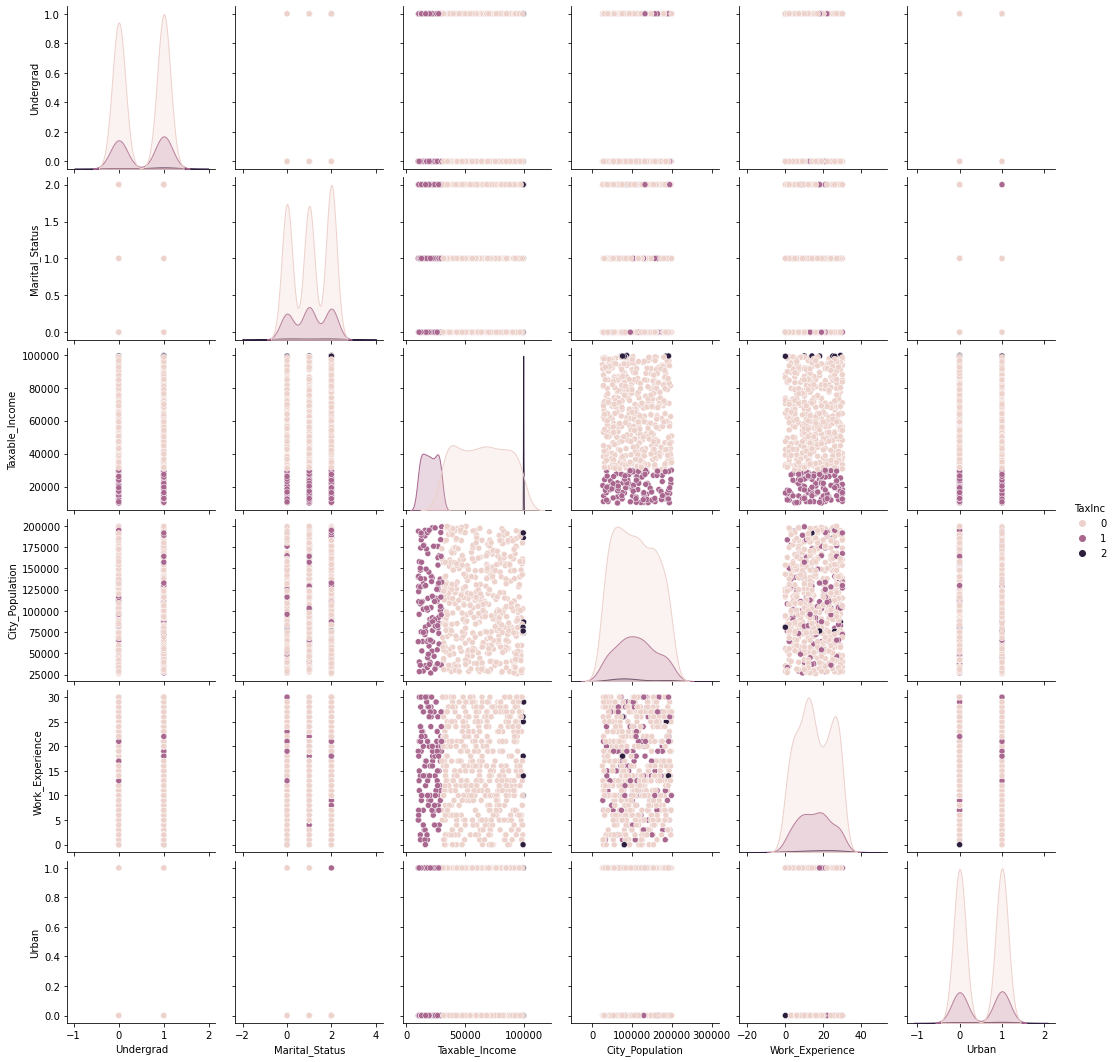

In [34]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=f_data, hue = 'TaxInc')

#### Droping the Taxable income  AND  City Population variable

In [35]:
f_data.drop(['Taxable_Income'],axis=1,inplace=True)
f_data.drop(['City_Population'],axis=1,inplace=True)

### Spliting The Dataset into Independent and Dependent variables

In [36]:
X = f_data.drop(['TaxInc'], axis=1)
Y = f_data['TaxInc']

In [37]:
X

Undergrad  Marital_Status  Work_Experience  Urban
0            0               2               10      1
1            1               0               18      1
2            0               1               30      1
3            1               2               15      1
4            0               1               28      0
..         ...             ...              ...    ...
595          1               0                7      1
596          1               0                2      1
597          0               0                0      1
598          1               1               17      0
599          0               0               16      0

[600 rows x 4 columns]

In [38]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxInc, Length: 600, dtype: int32

### Splitting data into training and testing data set

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

### Building Decision Tree Classifier Using Entropy criteria 

In [40]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Plotting The Decision Tree 

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1500)
tree.plot_tree(model1,
               filled = True);

### Predicting The data

In [42]:
preds1 = model1.predict(X_test)  
pd.Series(preds1).value_counts()

0    119
1      1
dtype: int64

In [43]:
preds1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
pd.crosstab(Y_test,preds1)

col_0    0  1
TaxInc       
0       89  1
1       28  0
2        2  0

In [45]:
np.mean(preds1==Y_test)

0.7416666666666667

###  Building Decision Tree Classifier (CART) using Gini Criteria

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [47]:
model_gini1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy

In [48]:
pred2=model_gini1.predict(X_test)
np.mean(pred2==Y_test)

0.75